## Predicción sobre la llegada del paquete a su destino
- La empresa de logística busca implementar un modelo que le permita predecir si un envió llegará a tiempo o no
- Según la información del datasets puesta a disposición, analizar los datos para poder optimizar los procesos logísticos

## Análisis exploratorio de datos
Lo que se hará primero será explorar el conjunto de datos, observar las características de las dimensiones, realizar análisis descriptivo y visualizar la relación entre las variables. Se comenzará con explorar el primer excel que contiene todas las variables. 

In [1]:
# instalamos la libreria necesario para importar el archivo excel
# pip install openyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importamos los datos del excel
data_train = pd.read_excel(r"./E-Commerce_train.xlsx")
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [4]:
data_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
data_train.duplicated().sum()

0

In [4]:
#eliminamos la variable ID que es innecesaria
data_train.drop(['ID'],axis=1, inplace=True)

In [5]:
data_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
data_train['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

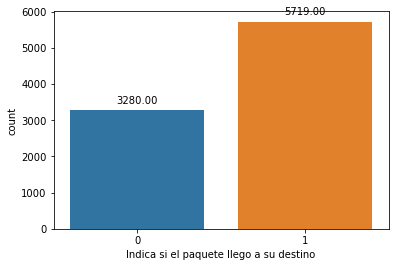

In [8]:
#Cantidad de paquetes que llegaron a su destino y los que no
ax = sns.countplot(x='Reached.on.Time_Y.N', data = data_train)
ax.set(xlabel = 'Indica si el paquete llego a su destino')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax;

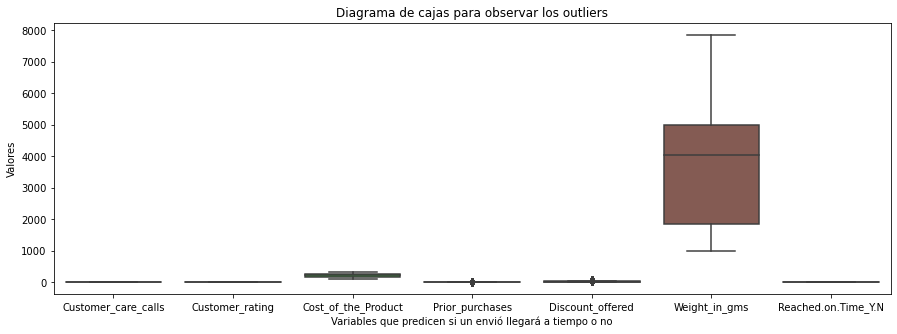

In [9]:
#Diagrama de cajas de las variables numéricas para observar los outliers
plt.figure(figsize=(15,5))
sns.boxplot(data= data_train)
plt.title('Diagrama de cajas para observar los outliers')
plt.xlabel('Variables que predicen si un envió llegará a tiempo o no')
plt.ylabel('Valores');

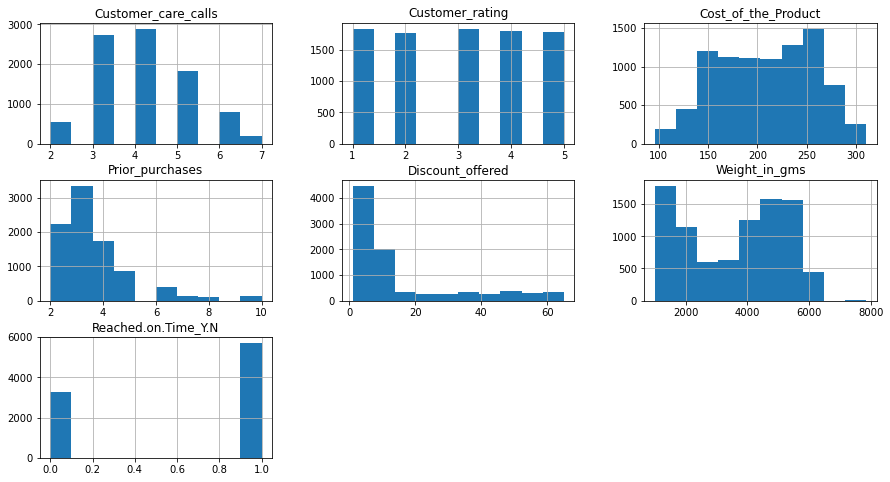

In [10]:
#Histograma de las variables numéricas
data_train.hist(figsize=(15,8));

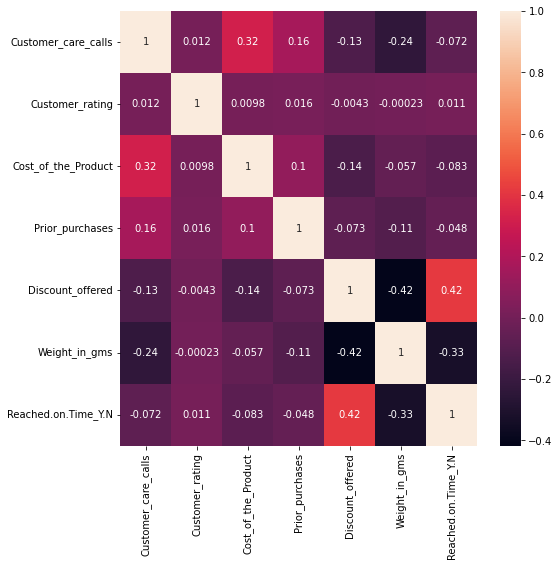

In [11]:
#Con heatmap identificamos las relaciones entre las variables
plt.figure(figsize=(8,8))
sns.heatmap(data_train.corr(),annot=True);

### Preprocesamiento de los datos
EL procesamiento implica separar o identificar datos categoricos o numéricoss, codificar variables categóricas, escalar los datos. 

In [12]:
#Separamos las etiquetas de las variables categoricas y las numéricas
cat=[]
num=[]
for i in data_train.columns:
  if data_train[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)
    
print(f'Categóricas = {cat}')
print(f'Numéricas = {num}')

Categóricas = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
Numéricas = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [13]:
# Eliminamos 'Reached.on.Time_Y.N' ya que lo consideran con una variable numérica
num.pop()

'Reached.on.Time_Y.N'

In [14]:
data_train[cat].describe().T

,count,unique,top,freq
Warehouse_block,8999,5,F,2999
Mode_of_Shipment,8999,3,Ship,6122
Product_importance,8999,3,low,4308
Gender,8999,2,F,4540


In [15]:
data_train[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,8999.0,4.015113,1.138934,2.0,3.0,4.0,5.0,7.0
Customer_rating,8999.0,2.994999,1.413143,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,8999.0,208.561507,48.289172,96.0,168.0,211.0,249.5,310.0
Prior_purchases,8999.0,3.511501,1.532074,2.0,3.0,3.0,4.0,10.0
Discount_offered,8999.0,15.097678,17.400040,1.0,4.0,8.0,19.0,65.0
Weight_in_gms,8999.0,3584.364596,1614.750194,1001.0,1857.0,4046.0,4999.5,7846.0


#### Dummies y Scaling en los datos
- Primero vamos a codificar las variables categóricas, es decir, con la función 'get_dummies' cambiaremos las variables categoricas que se encuentran en formato string a dummies para poder trabajar con números (0 y 1).
- Después se hará el escalado de las variables numéricas, estádaiza los datos eliminando la medi y escalando los datos de forma que su varianza sea igual a 1.

In [26]:
#Realizamos una copia del df
df_encoded = data_train.copy()

df_encoded_1 = pd.get_dummies(df_encoded[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']])
df_encoded_2 = pd.get_dummies(df_encoded['Gender'], drop_first = True)
df_encoded_3 = pd.concat([df_encoded_1, df_encoded_2], axis=1)
df_encoded = df_encoded.drop(df_encoded[cat], axis=1)
df_encoded = pd.concat([df_encoded, df_encoded_3], axis=1)
df_encoded


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,1,4177,1,0,0,0,1,0,0,0,1,0,1,0,0
8995,5,3,232,3,3,4526,0,0,0,0,0,1,0,0,1,0,0,1,1
8996,4,5,260,3,6,4221,0,1,0,0,0,0,0,0,1,0,0,1,0
8997,4,2,184,3,5,5931,1,0,1,0,0,0,0,0,1,0,0,1,0


In [29]:
#importando StandarScale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_encoded = df_encoded[num]
scaled_encoded = scaler.fit_transform(scaled_encoded)

#Ahora creamos un
scaled = df_encoded.copy()
scaled[num] = scaled_encoded

scaled

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,M
0,-0.013270,-0.704143,-0.653630,-0.333881,1.661141,-1.456259,1,0,0,0,1,0,1,0,0,0,1,0,0
1,-0.013270,1.418902,0.154049,-0.986627,2.523256,-0.307411,1,0,0,0,0,1,1,0,0,0,1,0,1
2,-1.769395,-0.704143,-0.529372,0.318866,1.891039,-0.130284,1,1,0,0,0,0,1,0,0,0,1,0,1
3,-0.891333,0.003539,-0.674340,0.318866,-0.292986,-1.490942,1,0,1,0,0,0,1,0,0,0,0,1,1
4,-1.769395,-0.704143,-0.508662,-0.333881,1.776090,-0.681484,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,-0.891333,-1.411824,0.174759,-0.333881,-0.810254,0.367034,1,0,0,0,1,0,0,0,1,0,1,0,0
8995,0.864793,0.003539,0.485405,-0.333881,-0.695306,0.583179,0,0,0,0,0,1,0,0,1,0,0,1,1
8996,-0.013270,1.418902,1.065277,-0.333881,-0.522883,0.394284,0,1,0,0,0,0,0,0,1,0,0,1,0
8997,-0.013270,-0.704143,-0.508662,-0.333881,-0.580357,1.453331,1,0,1,0,0,0,0,0,1,0,0,1,0


## Desarrollando el modelo
- Primero se va a dividir los datos en muestras de entrenamiento y de prueba

In [30]:
from sklearn.model_selection import train_test_split

X = scaled.drop(['Reached.on.Time_Y.N'], axis = 1).values
y = scaled['Reached.on.Time_Y.N'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6749, 18) (2250, 18) (6749,) (2250,)


## Logistic regresion

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

NameError: name 'X_train' is not defined

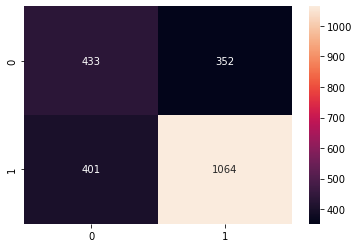

In [34]:
from sklearn.metrics import confusion_matrix
log_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(log_mat, annot = True, fmt= "g");

In [35]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#Exhaustividad / Recall 
exhaustividad = recall_score(y_test, y_test_pred)
print(exhaustividad)

#Exactitud
exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

#F1
F1 = f1_score(y_test, y_test_pred)
print(F1)

#Curva ROC-AOC
curva_roc_auc = roc_auc_score(y_test, y_test_pred)
print(f'Curva ROC-AUC del modelo:  {curva_roc_auc}')

0.7262798634812286


### Probando en el datasets de prueba

In [56]:
data_test = pd.read_excel(r'./E-Commerce_test.xlsx')
data_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


In [57]:
#Realizamos una copia del df
df_test = data_test.copy()

df_1 = pd.get_dummies(df_test[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']])
df_2 = pd.get_dummies(df_test['Gender'], drop_first = True)
df_3 = pd.concat([df_1, df_2], axis=1)
df_test = df_test.drop(df_test[cat], axis=1)
df_test = pd.concat([df_test, df_3], axis=1)

In [58]:
scaled_test = df_test[num]
scaled_test = scaler.fit_transform(scaled_test)

#Ahora creamos un
scaled_2 = df_test.copy()
scaled_2[num] = scaled_test


#Eliminando la columna ID
scaled_2 = scaled_2.drop('ID', axis=1)


In [60]:
X2 = scaled_2
y2_pred = model_lr.predict(X2)

In [61]:
Darkencc = pd.DataFrame(y2_pred, columns = ['pred'])
Darkencc

,pred
0,1
1,1
2,0
3,0
4,0
...,...
1995,0
1996,1
1997,1
1998,0


In [62]:
Darkencc.to_csv('Darkencc.csv', index = False)